In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('firstname_with_sex.csv', sep=';', encoding='utf-8')
df.head()

,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951


In [41]:
df['male_c'] = df.apply(lambda row: '{:.2f}'.format(row['male']/(row['male']+row['female'])*100), axis = 1)
df['female_c'] = df.apply(lambda row: '{:.2f}'.format(row['female']/(row['male']+row['female'])*100), axis = 1)
df['sex'] = df.apply(lambda row: 1 if row['male']>row['female'] else 0, axis = 1)
df['length'] = df.apply(lambda row: len(row['firstname']), axis = 1)

df['2l'] = df.apply(lambda row: row['firstname'][-2:], axis = 1)
df['1l'] = df.apply(lambda row: row['firstname'][-1], axis = 1)

In [42]:
def compter(prenom):
    voyelles = 0
    consonnes = 0
    for lettre in prenom.lower():
        if lettre in 'aeiouy':
            voyelles += 1
        elif lettre.isalpha():
            consonnes += 1
    return voyelles, consonnes

In [43]:
df['voyelles'], df['consonnes'] = zip(*df['firstname'].apply(compter))

In [44]:
df.head()

,firstname,male,female,male_c,female_c,sex,length,2l,1l,voyelles,consonnes
0,marie,10145,2390322,0.42,99.58,0,5,ie,e,3,2
1,jean,1869615,6476,99.65,0.35,1,4,an,n,2,2
2,pierre,1475841,5047,99.66,0.34,1,6,re,e,3,3
3,jeanne,1765,1097397,0.16,99.84,0,6,ne,e,3,3
4,françois,1089009,5951,99.46,0.54,1,8,is,s,3,5


### Distribution des labels

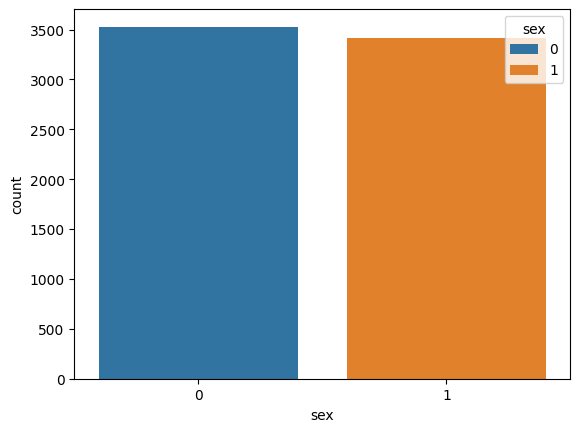

In [59]:
sns.countplot(data = df, x = df['sex'], hue='sex');

### Autres variables

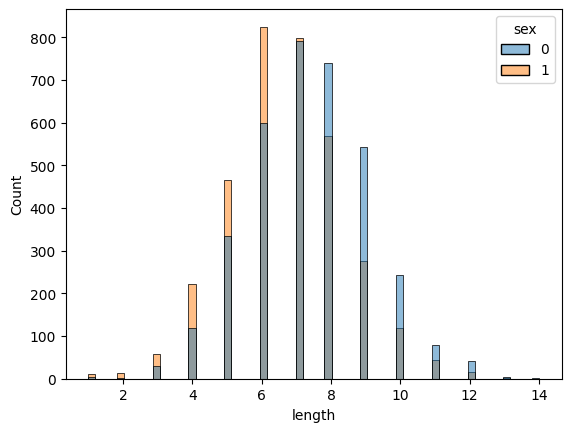

In [46]:
sns.histplot(data = df, x = df['length'], hue = df['sex']);

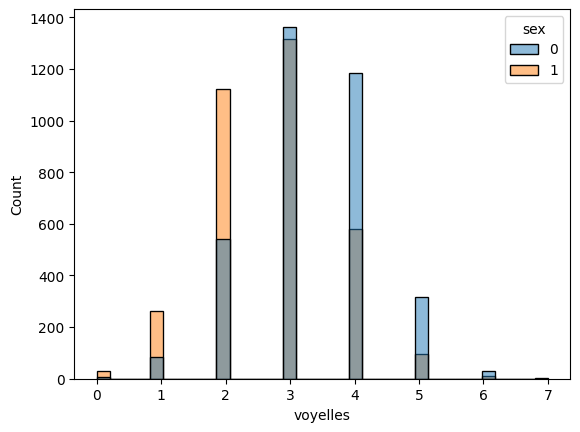

In [47]:
sns.histplot(data = df, x = df['voyelles'], hue = df['sex']);

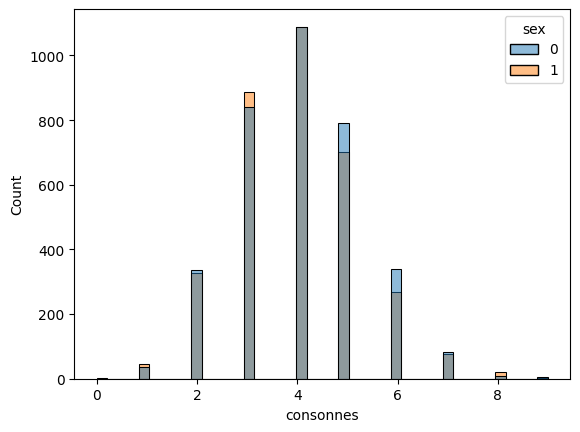

In [48]:
sns.histplot(data = df, x = df['consonnes'], hue = df['sex']);

### Test data

In [49]:
df1 = pd.read_csv('transcriptions_with_sex.csv')
data = df1[['prediction', 'sex']]
data.head()

,prediction,sex
0,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,nom: Lhopital prénom: Louis Jean date_naissanc...,homme
2,nom: Pyrin prénom: Marie date_naissance: 55 re...,femme
3,nom: Lavocat prénom: Marie date_naissance: 187...,femme
4,nom: Benne prénom: Marguerite date_naissance: ...,femme


In [50]:
# Nettoyer et extraire les mots
def split(text):
    text = ''.join([char.lower() for char in text])
    return text.split()

word_counts = Counter()
data['prediction'].apply(lambda x: word_counts.update(split(x)))

most_common_words = word_counts.most_common(6)  

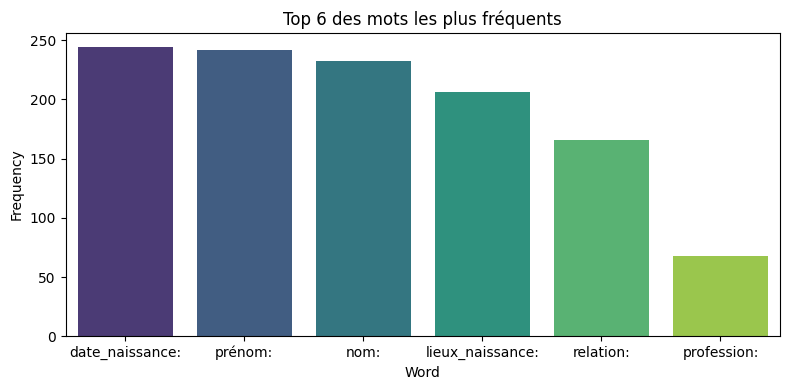

In [52]:
words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(8, 4))
sns.barplot(x='Word', y='Frequency', data=words_df, palette='viridis')
plt.title('Top 6 des mots les plus fréquents')
plt.tight_layout()
plt.show();

In [54]:
def extraire_valeurs(phrase):
    valeurs = {}
    mots = phrase.split()
    for i in range(len(mots)):
        mot = mots[i]
        if mot.endswith(':'):
            for mot_tuple in most_common_words:
                if mot_tuple[0] == mot:
                    if i + 1 < len(mots):
                        valeurs[mot[:-1]] = mots[i+1]
                    else:
                        valeurs[mot[:-1]] = None
                    break
    return valeurs

In [55]:
data['valeurs'] = data['prediction'].apply(extraire_valeurs)
data = pd.DataFrame(data['valeurs'].tolist())
data.head()

,nom,prénom,date_naissance,lieux_naissance,relation,profession
0,Chardon,Marie,30,"""",NaN,NaN
1,Lhopital,Louis,67,Sn,NaN,NaN
2,Pyrin,Marie,55,NaN,d,NaN
3,Lavocat,Marie,1875,Rigny,NaN,''
4,Benne,Marguerite,78,id,'',NaN


In [58]:
round(data.isna().sum()/data.shape[0]*100)

nom                 4.0
prénom              0.0
date_naissance      0.0
lieux_naissance    17.0
relation           33.0
profession         72.0
dtype: float64